# Predicting Heart Disease using Machine Learning - A classification

### What is classification?
Classification involves deciding whether a sample is part of one class or another(**single-class classification**). If there are multiple class options, it is referred to as **multi-class classification**.

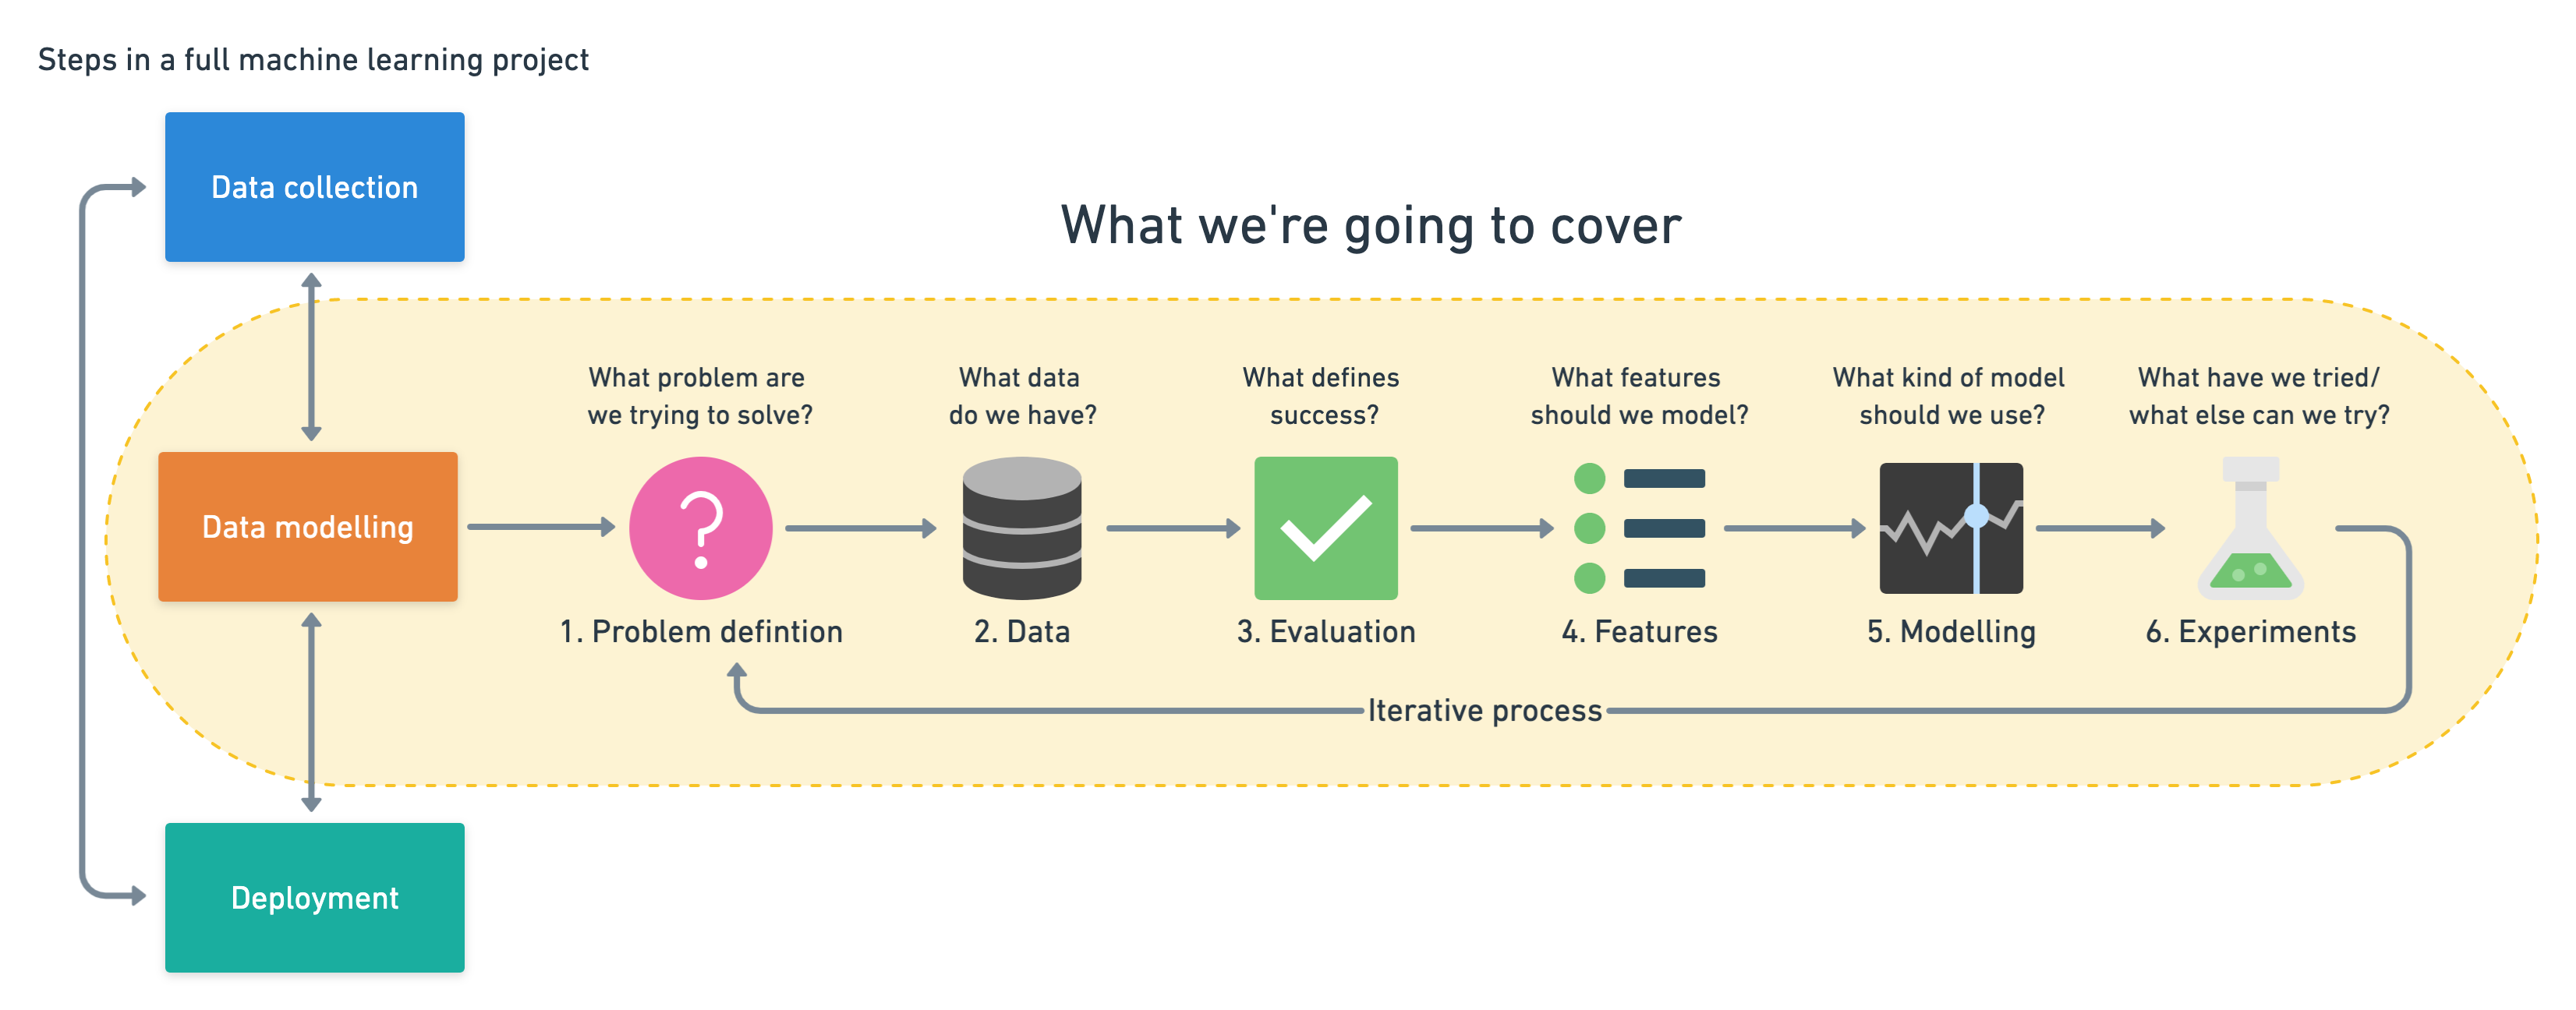

Steps covered: 
* **Exploratory Data Analysis(EDA)** - the process of going through a dataset and finding out more about it. 
* **Model Training** - create model(s) to learn to predict a target variable based on other variables.
* **Model Evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Model Comparison** - comparing several different models to find the best one. 
* **Model fine-tuning** - once we have found a good model, how can we improve it?
* **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Cross-validation** - working on unseen data.
* **Reporting** what we've found.


Libraries used: pandas, NumPy and matplotlib for data analysis, Scikit-Learn for Machine Learning and modelling tasks.

## 1. Problem Definition
The problem is Binary Classification. Predicting whether one have heart disease or not. 

Statement : **Given clinical parameters about a patient, can we predict whether or not they have heart disease?**

## 2. Data
Data from kaggle has 14 attributes(features) https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset 


## 3. Evaluation
The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like,

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features
Creating a data dictionary. A data dictionary describes the data you are dealing with. 

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply   to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
   * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2 * triglycerides
   * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
   * 0: Nothing to note
   * 1: ST-T Wave abnormality
     * can range from mild symptoms to severe problems
     * signals non-normal heart beat
   * 2: Possible or definite left ventricular hypertrophy
     * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

In [2]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear in the notebook 
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#### Load Data


In [4]:
df = pd.read_csv("data/heart-disease.csv")
df.shape # row, columns  

(303, 14)

#### Data Exploration ( exploratory data analysis or EDA)
Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

* What question(s) are you trying to solve (or prove wrong)?
* What kind of data do you have and how do you treat different types?
* What’s missing from the data and how do you deal with it?
* Where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out of your data?

In [5]:
df.head() # top 5 rows of our dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Top 10 
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
df.target.value_counts() # how many rows with 1(positive) and 0(negative)

1    165
0    138
Name: target, dtype: int64

In [9]:
# percentages 
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

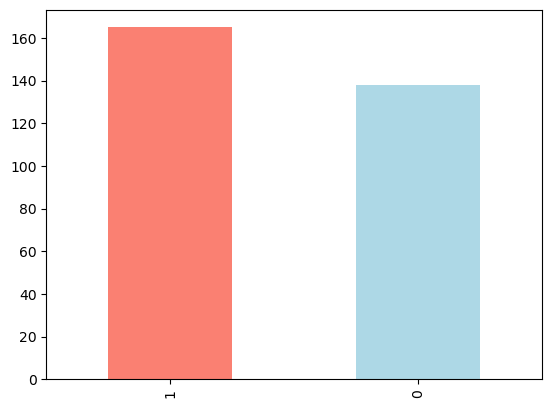

In [11]:
# Plotting the target column 
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart Disease Frequency accoring to gender 
If you want to compare two columns to each other, you can use the function pd.crosstab(column_1, column_2)

In [17]:
df.sex.value_counts() # 1= male, 0= female


1    207
0     96
Name: sex, dtype: int64

In [18]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


We can infer, based on this one variable if the participant is a woman, there is a 75% chance she has heart disease.
For a male, 50% chance. Averaging these two values, we can assume that thers is 62.5% chance they have a heart disease. 

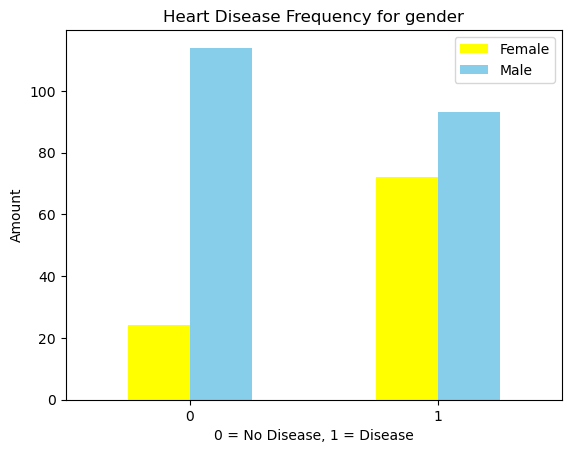

In [24]:
# visual crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['yellow', 'skyblue']); 

# add some attributes
plt.title("Heart Disease Frequency for gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=1);

#### Age vs Max heart rate for Heart Disease


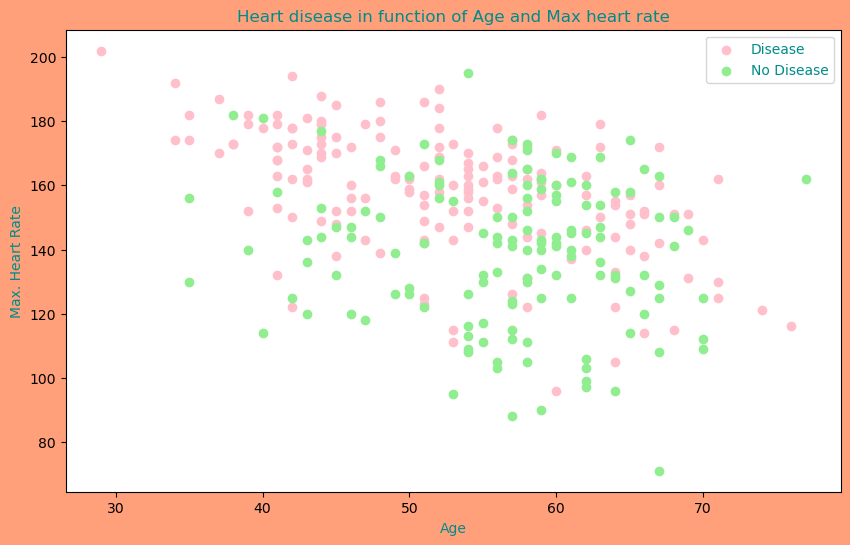

In [43]:
# Create another figure
plt.figure(figsize=(10,6), facecolor="lightsalmon")

# Start with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target ==1],
            c="pink")
# Negative examples 
plt.scatter(df.age[df.target == 0 ],
            df.thalach[df.target == 0],
            c ="lightgreen")

# Add some info 
plt.title("Heart disease in function of Age and Max heart rate", c="darkcyan")
plt.xlabel("Age", c="darkcyan")
plt.ylabel("Max. Heart Rate", c="darkcyan")
plt.legend(["Disease", "No Disease"], labelcolor="darkcyan");

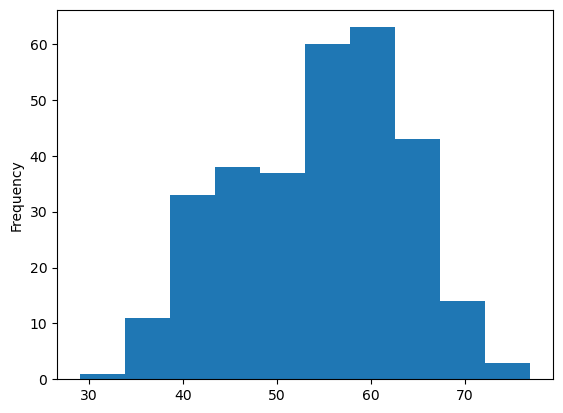

In [46]:
# age distribution 
df.age.plot(kind="hist");

#### Heart Disease Frequency per Chest pain type

In [47]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


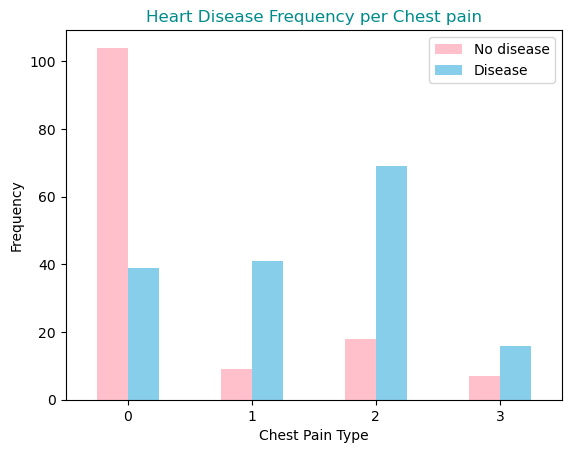

In [50]:
# Plot
pd.crosstab(df.cp, df.target).plot(kind='bar', color=["pink","skyblue"])

# Add attributes 
plt.title("Heart Disease Frequency per Chest pain", color="darkcyan")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

#### Correlation between independent variables
using df.corr()- correlation matrix

In [51]:
# Find the correlation between pur independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


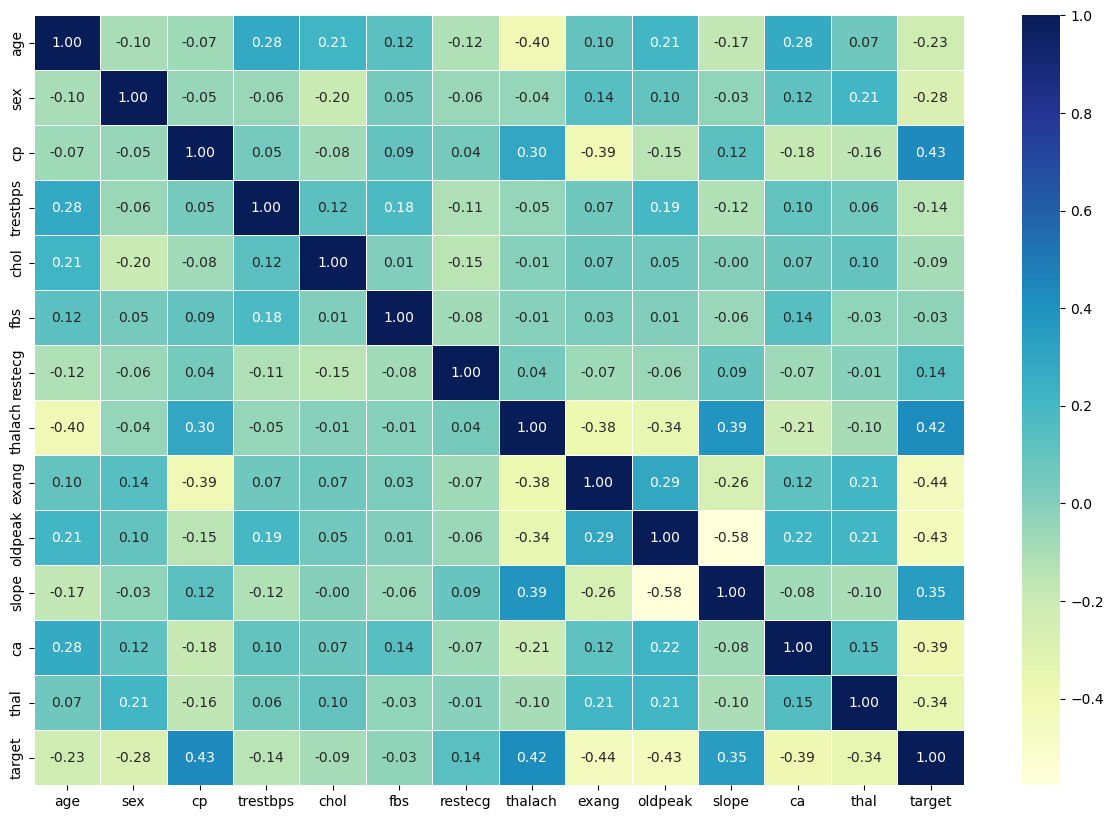

In [54]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

## 5. Modeling 


In [59]:
# Split the target variable 
X = df.drop("target", axis=1)

y = df.target.values

In [60]:
X, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [61]:
# Split in train test data 
# Random seed
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2)

In [62]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [63]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


### Model choices: 
1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()

In [75]:
# Put models in a dictionary 
models = {"KNN" : KNeighborsClassifier(),
          "Logistic Regression" : LogisticRegression(),
          "Random Forest" : RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate the models in dictionary
    """
    # Random seed
    np.random.seed(42)
    
    # List to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [76]:
model_scores = fit_and_score(models,
                             X_train, 
                             X_test,
                             y_train,
                             y_test)
model_scores

/Users/malik/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

#### Model Comparison

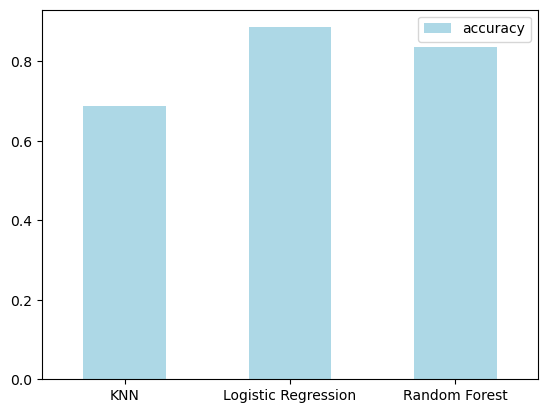

In [81]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind="bar", color="lightblue")
plt.xticks(rotation=0);

Briefly go through each before we see them in action.

* Hyperparameter tuning - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* Feature importance - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* Recall - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
* Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
* ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
* Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

### Hyperparameter tuning and Cross-validation
Flow:
1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

#### Tune KNeighborsClassifier(KNN) by hand
n_neighbors=5(default)
If n_neighbors=5 then it assume a dot with the 5 closest dots around it are in the same class.

In [82]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [83]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [84]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


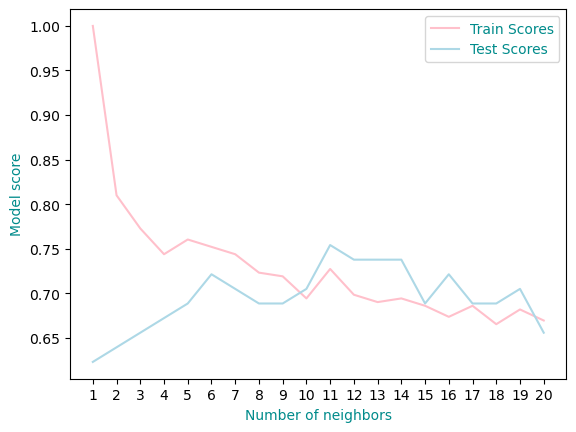

In [91]:
# Plot the scores
plt.plot(neighbors, train_scores, label ="Train Scores", color="pink")
plt.plot(neighbors, test_scores, label= "Test Scores", color="lightblue")
plt.xticks(np.arange(1,21,1))

plt.xlabel("Number of neighbors", color="darkcyan")
plt.ylabel("Model score", color="darkcyan")
plt.legend(labelcolor="darkcyan")

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Even after hyperparameter tuning the KNN is not even near to what Logistic regression and Random forest classifier performed. So, we discard the KNN and focus on ther other two models.

### Tuning models with RandomizedSearchCV
Let's create a hyperparameter grid.

In [92]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 10, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [97]:
# Tune the LogisticRegression Model using above grid
# random seed
np.random.seed(42)

# random hyperparameter search 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter = 20, 
                                verbose = True)

# Fit the random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [98]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [99]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [101]:
# Tune the RandomForestClassifier using the grid
# Random seed
np.random.seed(42)

# random hyperparameter search 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5, 
                           n_iter=20,
                           verbose = True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [102]:
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 6,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [103]:
rs_rf.score(X_test, y_test)

0.8852459016393442

### Evaluating a classification model, beyond accuracy


In [104]:
y_preds = rs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [105]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

/Users/malik/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


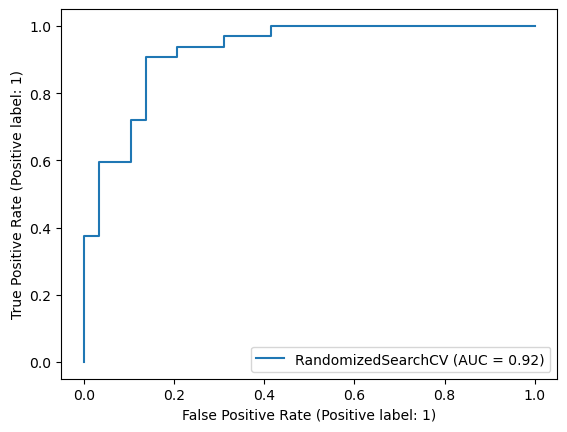

In [106]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_log_reg, X_test, y_test)

In [107]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


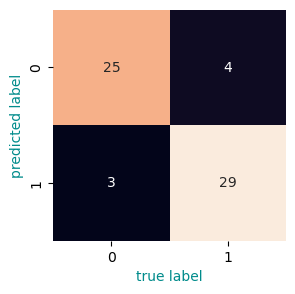

In [108]:
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar=False)
    plt.xlabel("true label", color="darkcyan")
    plt.ylabel("predicted label", color="darkcyan")
    
plot_conf_mat(y_test, y_preds)

## Classification Report

In [109]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [111]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [112]:
clf = LogisticRegression(C = 0.23357214690901212,
                         solver = "liblinear")

In [114]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X, 
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [115]:
# Cross-validated precision score
cv_precision = cross_val_score(clf,
                         X, 
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [116]:
# Cross-validated recall score
cv_recall = cross_val_score(clf,
                         X, 
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [117]:
# Cross-validated f1 score
cv_f1 = cross_val_score(clf,
                         X, 
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

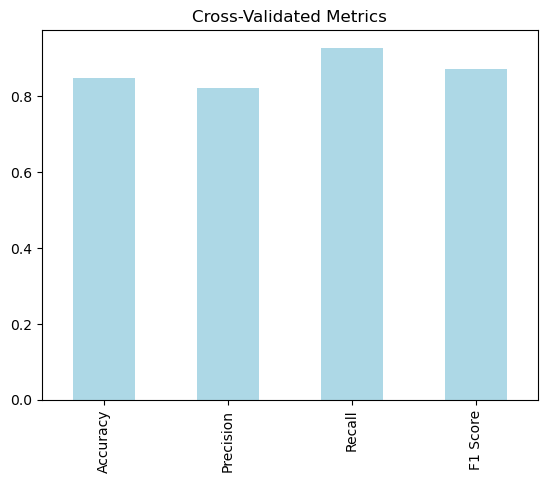

In [121]:
# visualizing them together 
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1 Score": cv_f1},
                           index = [0])
cv_metrics.T.plot.bar(color="lightblue", title="Cross-Validated Metrics", legend=False);

## Feature Importance
Which features contributing most to the outcomes of the model?

In [122]:
# Fit an instance of LogisticRegression 
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [123]:
#check coef - coefficient of features in the decision function
clf.coef_

array([[ 0.00369922, -0.90424088,  0.67472827, -0.0116134 , -0.00170364,
         0.04787688,  0.33490193,  0.02472938, -0.63120404, -0.57590935,
         0.47095131, -0.65165349, -0.69984205]])

In [124]:
# Match features to columns 
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.00369921995739679,
 'sex': -0.904240883105884,
 'cp': 0.6747282665482508,
 'trestbps': -0.011613402206070232,
 'chol': -0.0017036444220110947,
 'fbs': 0.047876884940122974,
 'restecg': 0.33490193264616785,
 'thalach': 0.024729383864758436,
 'exang': -0.6312040412085093,
 'oldpeak': -0.5759093487804694,
 'slope': 0.4709513113759355,
 'ca': -0.651653489534098,
 'thal': -0.6998420489897489}

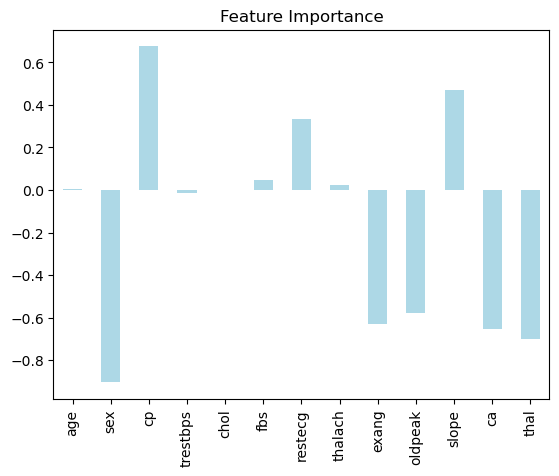

In [128]:
# Visualize Feature Importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", color="lightblue", legend=False);

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.